<a href="https://colab.research.google.com/github/rohanmad/css-exercises/blob/main/SV_2_1_Building_a_Deep_Learning_Framework_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Copyright: © NexStream Technical Institute, LLC**.  
All rights reserved

# Building a Deep Neural Network with a Custom Framework in Numpy
In this project, you will implement a deep neural network from scratch using standard Python and Numpy libraries.  Please complete the following steps in your Colab Script. The reference script below provides template code and hints to help with each step. You will be turning in code and screenshots of your console output in an accompanying assignment.

The following instructions are identified as Steps in the text cells preceding their corresponding code cell. Read through the instructions and write/fill-in the appropriate code in the cells.

##Part A:  Dataset Creation and Preprocessing



In this section, you will set up your drive, create a synthetic dataset, and preprocess the data in preparation for deep network algorithms.  Please follow the steps outlined in the following cells and fill in your code where prompted.  
<br>


**Step A-1:**
- Mount your Google drive.
- Upload the utility files indicated in the code cell below from the materials folder provided with this course and copy them to your project directory.
- Import the numpy module as np and the random module. A tip – try to keep all of your imports in the same place (usually at the top of your code). This is good practice and useful for clean code.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

#See the reference cp commands below.  Update this to your own drive path.
!cp drive/My\ Drive/Colab\ Notebooks/tf_image_utils_v2.py .
!cp drive/My\ Drive/Colab\ Notebooks/h5py_image_utils.py .
!cp drive/My\ Drive/Colab\ Notebooks/train_catvnoncat.h5 .
!cp drive/My\ Drive/Colab\ Notebooks/test_catvnoncat.h5 .

Mounted at /content/drive


In [ ]:
### BEGIN CODE HERE

import numpy as np

import h5py
import h5py_image_utils
from h5py_image_utils import *
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import seaborn as sns
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from google.colab import files

import tensorflow as tf
import tensorflow_datasets as tfds
import tf_image_utils_v2
from tf_image_utils_v2 import *

### END CODE HERE

**Step A-2:** Create a Synthetic Dataset

- Use the following code cells to generate synthetic data and create the train and test datasets.
- Print the shapes of the datasets.  Your shapes output should be the following:  
  - X is of shape:  (10, 5)
  - Y is of shape:  (1, 5)
- Verify the doctest modules included in the cells run without any errors

In [ ]:
# Example data.
np.random.seed(0) #do not change - for grading purposes

x_example = np.random.randn(10, 5)
y_example = np.array([1, 0, 0, 1, 1])
y_example = y_example.reshape(1, y_example.shape[0])

print ("X is of shape: ", x_example.shape)
print ("Y is of shape: ", y_example.shape)
print(x_example)

import doctest
"""
  >>> print(x_example.shape)
  (10, 5)
  >>> print(y_example.shape)
  (1, 5)
"""

doctest.testmod()


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.8/doctest.py", line 1487, in run
    sys.settrace(save_trace)



X is of shape:  (10, 5)
Y is of shape:  (1, 5)
[[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462]
 [-1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]
 [ 0.15494743  0.37816252 -0.88778575 -1.98079647 -0.34791215]
 [ 0.15634897  1.23029068  1.20237985 -0.38732682 -0.30230275]
 [-1.04855297 -1.42001794 -1.70627019  1.9507754  -0.50965218]
 [-0.4380743  -1.25279536  0.77749036 -1.61389785 -0.21274028]]


TestResults(failed=0, attempted=2)

## Part 1:  The Framework

### 1.1  Layer Class
In this section you will create a Layer class.  Test your code using the example data in the following code cell.  Complete the following steps and refer to the previous lecture units for guidance.  
- Step 1-1a:  Create the Layer class.
- Step 1-1b:  Write the class constructor.
- Step 1-1c:  Write the sigmoid, relu, and tanh activation functions.
- Step 1-1d:  Write the activation_backward function to compute the derivatives of the activations.


In [ ]:
class Layer:
    def __init__(self, input_shape, output_shape, initialization, activation='None'):

        if initialization == 'He':
            self.weights = np.random.randn(input_shape, output_shape) * np.sqrt(2 / input_shape)

        elif initialization == 'random':
            self.weights = np.random.randn(input_shape, output_shape)
        self.biases = np.zeros((1, output_shape))

        self.activation = activation

    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))

    def relu(self, Z):
        return np.maximum(0, Z)

    def tanh(self, Z):
        return np.tanh(Z)

    def activation_backwards(self, dA):
        if self.activation == 'sigmoid':
            sigmoid_grad = self.sigmoid(dA) * (1 - self.sigmoid(dA))
            dZ = dA * sigmoid_grad
            return dZ
        elif self.activation == 'relu':
            relu_grad = np.where(dA > 0, 1, 0)
            dZ = dA * relu_grad
            return dZ
        elif self.activation == 'tanh':
            tanh_grad = 1 - np.square(np.tanh(dA))
            dZ = dA * tanh_grad
            return dZ

    def forward(self, X):
        Z = np.dot(X, self.weights) + self.biases
        if self.activation == 'sigmoid':
            A = self.sigmoid(Z)
        elif self.activation == 'relu':
            A = self.relu(Z)
        elif self.activation == 'tanh':
            A = self.tanh(Z)
        return A

    def backward(self, X, Y, dA):
        m = X.shape[0]
        dZ = self.activation_backwards(dA)
        dW = np.dot(X.T, dZ) / m
        db = np.sum(dZ, axis=0, keepdims=True) / m
        dX = np.dot(dZ, self.weights.T)
        return dX, dW, db

    def update(self, learning_rate, dW, db):
        self.weights -= learning_rate * dW
        self.biases -= learning_rate * db

**Step 1.2:**  Layer Class Instantiation  
Instantiate a layer with input units equal to the number of features in x_example, 5 output units, and relu activation. Print out the weights and biases.


In [ ]:

# instantiate a layer.
np.random.seed(0)

# Initialize the layer with input shape 5, output shape 5, and 'random' initialization.
layer = Layer(5, 5, 'random', 'relu')

print ("Weights: \n", layer.weights)
print ("Biases: \n", layer.biases)



import doctest

"""
  >>> print(np.round(layer.weights[0][0], 3))
  0.789
  >>> print(np.round(layer.weights[4][0], 3))
  -0.469
  >>> print(np.round(layer.biases[0][0], 1))
  0.0
"""

doctest.testmod()

Weights: 
 [[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799]
 [-0.97727788  0.95008842 -0.15135721 -0.10321885  0.4105985 ]
 [ 0.14404357  1.45427351  0.76103773  0.12167502  0.44386323]
 [ 0.33367433  1.49407907 -0.20515826  0.3130677  -0.85409574]
 [-2.55298982  0.6536186   0.8644362  -0.74216502  2.26975462]]
Biases: 
 [[0. 0. 0. 0. 0.]]
**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(np.round(layer.weights[0][0], 3))
Expected:
    0.789
Got:
    1.764
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print(np.round(layer.weights[4][0], 3))
Expected:
    -0.469
Got:
    -2.553
**********************************************************************
1 items had failures:
   2 of   3 in __main__
***Test Failed*** 2 failures.


TestResults(failed=2, attempted=3)

**Step 1.3:**  Layer Class FeedForward - forward step  
Compute forward step for a single layer.

In [ ]:
# Compute forward step for a single layer.
def forward(layer, input):

  ### BEGIN CODE HERE

  # Create an instance variable for the input.
  layer.input = None


  # Calculate Z using the weights, biases, and input of this layer,
  # then store Z in an instance variable
  Z = None
  layer.Z = None

  # Use the right activation function by accessing the activation
  # of your layer instance, then calling the correct function as a method.
  if None == "None":
    A = None

  elif None == "None":
    A = None

  elif None == 'None':
    A = None

  # Store the activation (ie the output) as an instance variable.
  layer.A = None

  ### END CODE HERE

  return A

**Step 1.4:**  Layer Class FeedForward - forward method call for the layer  
Calculate A for your example data with the layer you previously instantiated.

In [ ]:
def forward(layer, input):
    # Create an instance variable for the input.
    layer.input = input
    # Calculate Z using the weights, biases, and input of this layer,
    # then store Z in an instance variable
    Z = np.dot(input, layer.weights) + layer.biases
    layer.Z = Z
    # Use the right activation function by accessing the activation
    # of your layer instance, then calling the correct function as a method.
    if layer.activation == "sigmoid":
        A = layer.sigmoid(Z)
    elif layer.activation == "relu":
        A = layer.relu(Z)
    elif layer.activation == 'tanh':
        A = layer.tanh(Z)
    # Store the activation (ie the output) as an instance variable.
    layer.A = A
    return A

import doctest

"""
  >>> print(layer.Z.shape)
  (5, 5)
  >>> print(layer.Z.shape)
  (5, 5)
  >>> print(np.round(layer.A[0][0], 3))
  0.141
  >>> print(np.round(layer.A[4][2], 3))
  0.79
"""

doctest.testmod()

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(layer.Z.shape)
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__[0]>", line 1, in <module>
        print(layer.Z.shape)
    AttributeError: 'Layer' object has no attribute 'Z'
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print(layer.Z.shape)
Exception raised:
    Traceback (most recent call last):
      File "/usr/lib/python3.8/doctest.py", line 1336, in __run
        exec(compile(example.source, filename, "single",
      File "<doctest __main__[1]>", line 1, in <module>
        print(layer.Z.shape)
    AttributeError: 'Layer' object has no attribute 'Z'
****************************************************************

TestResults(failed=4, attempted=4)

**Step 1.5:**  Layer Class Back Propagation - backward method call for the layer  
Calculate the backward step.

In [ ]:
def backward(layer, dA_prev):
    # Calculate dZ by calling the activation_backwards() method from your layer instance.
    dZ = layer.activation_backwards(dA_prev)
    # Extract the number of examples from the shape of the input.
    m = layer.input.shape[1]
    # Calculate dW and db using the input to this layer (ie the activation of the previous layer).
    layer.dW = np.dot(layer.input.T, dZ) / m
    layer.db = np.sum(dZ, axis=0, keepdims=True) / m
    # Calculate dA_prev using the weights of this layer and dZ.
    dA_prev = np.dot(dZ, layer.weights.T)


  ### END CODE HERE

    return dA_prev

**Step 1.6:**  Layer Class Back Propagation - derivative of activation  
Calculate dAL, the derivative of the activation.
Confirm your outputs pass the doctests in the cell.

In [ ]:
# Calculate the derivative of the output.
dAL = - (np.divide(y, (A + 1e-8)) - np.divide(1 - y, (1 - A + 1e-8)))
print ("dAL: \n", dAL)

# Run the doctest module to check the output.
import doctest

"""
  >>> print(np.round(dAL[0][0], 3))
  -7.101
  >>> print(np.round(dAL[0][2], 3))
  -2.277
  >>> print(np.round(dAL[3][2], 3))
  1.14
"""

doctest.testmod()

**Step 1.7:**  Layer Class Back Propagation - derivative of previous layer  
Calculate dA_prev, the derivative of the activation of the previous layer using the backward function.


In [ ]:
# Calculate the derivative of the activation of the previous layer using the backward function.

### BEGIN CODE HERE

dA_prev = None

### END CODE HERE

print ("dA_prev: \n", dA_prev)
assert (dA_prev.shape == layer.input.shape)
assert (layer.dW.shape == layer.weights.shape)
assert (layer.db.shape == layer.biases.shape)


import doctest

"""
  >>> print(np.round(dA_prev[0][0], 3))
  -5.534
  >>> print(np.round(dA_prev[0][2], 3))
  -3.951
  >>> print(np.round(dA_prev[6][2], 3))
  -3.009
"""

doctest.testmod()

**Step 1.8:**  Layer Class Back Propagation - update  
Update the layer weights and biases.

In [ ]:
def update(layer, learning_rate):

  ### BEGIN CODE HERE

  # Update the parameters using the instance
  # variables you calculated earlier.
  layer.weights = None
  layer.biases = None

  ### END CODE HERE

**Step 1.9:** Layer Class Back Propagation - update method call  
Call the update method with a learning rate of 0.001.

TESTING NOTE:  If you need to run this cell (e.g. to debug your code) more than one time sucessively, you will need to rerun the preceding initialization steps since the instance variables in the Layer class (i.e. the weights and biases) will assume new values and therefore will be used as the stored values for each subsequent call.  This in turn will result in your doctests failing since they are built upon the first update following the initialization steps.

In [ ]:
# Call the update function.

### BEGIN CODE HERE

update(layer, 0.001)

### END CODE HERE

print ("Updated weights: \n", layer.weights)
print ("Updated biases: \n", layer.biases)


import doctest

"""
  >>> print(np.round(layer.weights[0][0], 3))
  0.792
  >>> print(np.round(layer.weights[3][5], 3))
  0.07
  >>> print(np.round(layer.biases[0][0], 3))
  0.002
  >>> print(np.round(layer.biases[3][0], 3))
  0.001

"""

doctest.testmod()

### 1.2  Dense Class
In this section you will create a Dense class, which is a child of the Layer class.  You will test your code using the example data in the next section.  Complete the following steps and refer to the previous lecture units for guidance.  
- Step 1.2a:  Create the Dense class as a child of the Layer class
- Step 1.2b:  Write the class constructor
- Step 1.2c:  Write the 'forward' method, passing 'self' instead of the layer object as was done in the previous section.  You also need to reference the Z and A variables as self.
- Step 1.2d:  Write the 'backward' method, again passing and utilizing 'self' instead of the layer object.  You do not need to implement the backpropagation dAL initialization yet (will be done in the model class).
- Step 1.2e:  Write the 'update' method, replacing the layer object with 'self'.

In [ ]:
class Dense(Layer):

  ### BEGIN CODE HERE

  # Inherit from the Layer class.
  def __init__(self, None, None, None, None='None'):
    super().__init__(None, None, None, None)

  #############################################
  # Forward step for a single layer.
  def forward(self, input):
    self.input = None
    Z = None
    self.Z = None

    # sigmoid activation
    if None == "None":
      A = None

    # relu activation
    elif None == "None":
      A = None

    # tanh activation
    if None == 'None':
      A = None

    self.A = A

  ### END CODE HERE

    assert (self.Z.shape == (self.weights.shape[0], self.A.shape[1]))
    assert (self.A.shape == (self.weights.shape[0], self.input.shape[1]))

    return A


  #############################################
  # Backward step for a single layer.
  def backward(self, dA_prev):

  ### BEGIN CODE HERE

    dZ = None
    m = None
    self.dW = None
    self.db = None
    dA_prev = None

  ### END CODE HERE

    assert (dA_prev.shape == self.input.shape)
    assert (self.dW.shape == self.weights.shape)
    assert (self.db.shape == self.biases.shape)

    return dA_prev


  #############################################
  # Parameter update for a single layer.
  def update(self, learning_rate):
    self.weights = self.weights - learning_rate * self.dW
    self.biases = self.biases - learning_rate * self.db

  #Accessor method for weights (self.weights)
  def getWeights(self):
    return self.weights

  #Accessor method for biases (self.biases)
  def getBiases(self):
    return self.biases

  ### END CODE HERE

### 1.3  Model Class
In this section you will create a Model class.  Test your code using the example data in the following code cell.  Complete the following steps and refer to the previous lecture units for guidance.  
- Step 1.3a:  Create the Model class
- Step 1.3b:  Write the class constructor.  Set a small epsilon value to 1e-8.
- Step 1.3c:  Write the 'build' method that inputs a list of layer instances defining the network.
- Step 1.3d:  Write the 'feedforward' method which propagates the input X through all the layers by calling the 'forward' method in a loop. Note that your input to each successive layer in the network is the output from the previous layer. Set your AL variable equal to the final layer output and return AL.
- Step 1.3e:  Write the 'compute_cost' method.  Implement the binary cross entropy loss equation.  Call the numpy 'squeeze' function to reduce the dimensions of the resultant cost.  Return the cost.
- Step 1.3f:  Write the 'backpropagation' method which inputs the derivative of the final layer output.  Loop over the layers in reverse order, calling the 'backward' method for each loop iteration.
- Step 1.3g:  Write the 'parameter_update' method.  Loop over the layers, calling the 'update' method for each looip iteration.
- Step 1.3h:  Write the 'train' method which implements a single iteration of training.  The method should input the input X, label Y, and learning rate, and return the cost for that iteration.  Remember to use 'self' when accessing the 'network' data structure, and when calling the 'feedforward', 'compute_cost', 'backpropagation' and 'parameter_update' methods.
- Step 1.3i:  Write the 'fit' method which runs the training over a number of iterations or 'epochs'.  Input the X, Y training data and learning rate.  Set the 'verbose' parameter to true if you want to see the costs printed.  Do not worry about the 'callback' parameter at this time (we'll use this in a later unit). Initialize an empty list which stores the cost for each epoch run, then loop over the number of iterations (epochs) and call the 'train' method, appending the returned cost to your list.
- Step 1.3j:  Write the 'predict' method which returns the predicted labels for our data.  Call the 'feedforward' method which returns AL, the activation for the final layer.  Convert the labels to binary values using the numpy 'where' method.
- Step 1.3k:  Write the 'evaluate' method which inputs the predictions and the training labels (i.e. the ground truth values).  Return an accuracy score.
- Step 1.3l:  Write the 'plot' method to plot the costs (y-axis) versus the epoch number (x-axis).


In [ ]:
class Model:

  def __init__(self):
    self.epsilon = 1e-8


  #############################################
  # Allow the network to be passed in as a single variable (a list).
  def build(self, network):
    ### BEGIN CODE HERE

    self.network = None

    ### END CODE HERE


  #############################################
  # Forward propagation.
  def feedforward(self, X):
    ### BEGIN CODE HERE

    # Set the input to X.
    input = None

    # Loop over the layers and call the forward method on each input.
    for None in None
      input = None

    # Set AL to the final value of input (i.e. the output of the final layer).
    AL = None

    ### END CODE HERE

    assert (AL.shape == (1, X.shape[1]))
    return AL


  #############################################
  # Compute cost - remember to call np.squeeze().
  def compute_cost(self, m, AL, Y):
    ### BEGIN CODE HERE

    cost = None
    cost = None

    ### END CODE HERE
    return cost


  #############################################
  # Backpropagate through layers.
  def backpropagation(self, dAL):
    ### BEGIN CODE HERE

    # Set dA_prev to dAL.
    dA_prev = None

    # Loop over the layers in reverse and call the backward method on each dA_prev.
    for None in None:
      dA_prev = None

    ### END CODE HERE


  #############################################
  # Parameter update.
  def parameter_update(self, learning_rate):

    ### BEGIN CODE HERE

    # Loop over layers and call the update method from each.
    for None in None:
      None

    ### END CODE HERE


  #############################################
  # Single iteration of descent.
  def train(self, X, Y, learning_rate):
    ### BEGIN CODE HERE

    # Extract number of example from the shape of Y.
    m = None

    # Compute AL by running forward propagation.
    AL = None

    # Cost calculation.
    cost = None

    Y = Y.reshape(AL.shape)


    # Initialize backpropagation by calculating dAL.
    dAL = None

    # Backpropagate through layers.
    None

    # Update parameters.
    None

    ### END CODE HERE
    return cost


  #############################################
  # Function for training loop.
  def fit(self, X_train, Y_train, epochs, learning_rate, verbose=False, callback=None):
    ### BEGIN CODE HERE

    # Initialize list of costs.
    costs = None

    # Loop over epochs.
    for None in None:

      # Call the train method and append the cost to the list.
      cost = None
      None

      ### END CODE HERE

      if (i % 50 == 0):
        if verbose==True:
          print ("Iteration: {}, cost: {}". format(i, cost))

        if (callback is not None):
          callback(i, X_train, Y_train)

    return costs


  #############################################
  # Predict labels.
  def predict(self, X):
    ### BEGIN CODE HERE

    # Get the predictions (output of the final layer after training).
    predictions = None

    # Set predictions to either 0 or 1.
    predictions = None

    ### END CODE HERE
    return predictions


  #############################################
  # Evaluate prediction accuracy.
  def evaluate(self, predictions, Y):
    ### BEGIN CODE HERE

    # calculate accuracy.
    accuracy = None

    ### END CODE HERE
    return accuracy

In [ ]:
### BEGIN CODE HERE

# Use matplotlib to plot the costs.
def plot(costs):
  ### BEGIN CODE HERE

  plt.plot(None)
  plt.xlabel('Epochs')
  plt.ylabel('Cost')

  ### END CODE HERE

  return plt

### 1.4  Test your code!!
Finally, you will test the framework you created with a simple perceptron example.  
- Step 1.4a:  Use the synthetic dataset created in the code cell below.  
- Step 1.4b:  Build your model as a simple perceptron (i.e. 1 output) with 2 independent variables (use shape[0]) and 4 examples.  Use the sigmoid activation function.
- Step 1.4c:  Call the 'fit' method on your model passing as inputs the X and Y training data.  Run for 2501 epochs and a learning rate of 0.0075.
- Step 1.4d:  Plot your costs.  

WHEN YOU COMPLETE THIS SECTION - STOP, ANSWER THE QUESTIONS IN THE ASSIGNMENT, AND CONTINUE WITH THE NEXT UNIT IN THIS COURSE.


In [ ]:
# Test your model with a simple perceptron and synthetic dataset
# Instantiate a simple perceptron.

# Example data.
np.random.seed(3) #do not change - for grading purposes

x_example_2 = np.random.randn(2, 4)
y_example_2 = np.array([0, 0, 0, 1])
y_example_2 = y_example_2.reshape(1, 4)

print ("X is of shape: ", x_example_2.shape)
print ("Y is of shape: ", y_example_2.shape)
print(x_example_2)


#Build the model as a simple perceptron (i.e. 1 output) with 2 independent variables (use shape[0]) and 4 examples
#  (use the example_2 data above)
np.random.seed(0) #do not change - for grading purposes

### BEGIN CODE HERE

perceptron = None
perceptron.build([
                  Dense(None, None, 'None')
])

# Fit the model.  Use 2501 epochs and a learning rate of 0.0075
costs = None

# Plot the costs
plot(costs)

### END CODE HERE

import doctest

"""
  >>> print(np.round(costs[0], 3))
  2.119
  >>> print(np.round(costs[75], 3))
  1.585
  >>> print(np.round(costs[1025], 3))
  0.184
  >>> print(np.round(costs[1557], 3))
  0.127
  >>> print(np.round(costs[2500], 3))
  0.083
"""

doctest.testmod()

## Project 1a:  Logic Gates Classification

Note: You should restart the runtime and rerun the initialization steps (drive mount, imports, and function cells) the properly set up the environment before running these steps.

### 2.1 AND  
In this section you will test your framework using the AND logic function. Test your code using the example data in the following code cells. Complete the following steps and refer to the previous lecture units for guidance.


**Step 2.1a:**  Setup the datasets
- Run the following code cell to setup your training and test datasets.
- Print out the shapes and output data.  You should see the following outputi for the shapes: (2, 4), (1, 4), (2, 4), (1, 4), and the following for the training:   X_train:  [[0 0 1 1] [0 1 0 1]], Y_train:  [[0 0 0 1]]


In [ ]:
# Set the input data
X_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# Set the labels, the correct results for the AND operation
Y_train = np.array([0, 0, 0, 1])

X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])
Y_test = np.array([0, 1, 0, 0])

Y_train = Y_train.reshape(1, 4)
Y_test = Y_test.reshape(1, 4)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_train)
print(Y_train)

(2, 4)
(1, 4)
(2, 4)
(1, 4)
[[0 0 1 1]
 [0 1 0 1]]
[[0 0 0 1]]


**Step 2.1b:** Create the model.  
Setup a perceptron as an instance of the Model class (single node).  
Recall our perceptron is simply an instance of the Dense class with 1 output unit, and a number of input units equal to the number of features in X (use the shape function on X_train as the input parameter).  Set the activation to be sigmoid.

In [ ]:
###BEGIN CODE HERE

# Instantiate a simple perceptron.
np.random.seed(0) #do not change - for grading purposes

perceptron = None

# Build your model.
perceptron.build([
                  None
])
###END CODE HERE

**Step 2.1c:** Train the model  
Fit the perceptron model to the data by calling the ‘fit’ method of the perceptron object.  Remember that ‘fit’ returns a list of costs.
Use 2501 epochs and a learning_rate of 0.0075.  Don't set anything for the verbose or callback parameters at this point.  


In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data (remember the fit() method returns a list of costs).
# Use 2501 epochs and a learning_rate of 0.0075. Don't set anything for the verbose or callback parameters
costs = None

### END CODE HERE

**Step 2.1d:** Plot and verify the costs.  
Make sure your doctests run without error


In [ ]:
### BEGIN CODE HERE

# Call the plotting function.
None

### END CODE HERE

print(costs)
import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.909
  >>> print(np.round(costs[75], 3))
  0.779
  >>> print(np.round(costs[1025], 3))
  0.408
  >>> print(np.round(costs[1557], 3))
  0.37
  >>> print(np.round(costs[2500], 3))
  0.32
"""

doctest.testmod()

**Step 2.1e:** Make predictions on train and test sets and evaluate performance.  
- Training set prediction  
- Test set prediction
- Performance Evaluation for Training set
- Performance Evaluation for Test set

Make sure your doctests run without error


In [ ]:
### BEGIN CODE HERE

# Make predictions on the train set.
predictions_train = None

# Make predictions on the test set.
predictions_test = None

### END CODE HERE

import doctest

"""
  >>> print(predictions_train)
  [[0 0 0 1]]
  >>> print(predictions_test)
  [[0 1 0 0]]
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the train set.
None

### END CODE HERE


import doctest

"""
  >>> print(perceptron.evaluate(predictions_train, Y_train))
  100.0
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the test set.
None

### END CODE HERE


import doctest
"""
  >>> print(perceptron.evaluate(predictions_test, Y_test))
  100.0
"""

doctest.testmod()

### 2.2 OR  
In this section you will test your framework using the OR logic function. Test your code using the example data in the following code cells. Complete the following steps and refer to the previous lecture units for guidance.  
- Step 2.2a:  Recreate your datasets for the OR function
- Step 2.2b:  Create the model
- Step 2.2c:  Train the model
- Step 2.2d:  Plot and verify the costs
- Step 2.2e:  Make predictions on train and test sets and evaluate performance

Make sure your doctests run without errors.




In [ ]:
# Set the input data
X_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# Set the labels, the correct results for the AND operation
Y_train = np.array([0, 1, 1, 1])

X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])
Y_test = np.array([1, 1, 0, 1])

Y_train = Y_train.reshape(1, 4)
Y_test = Y_test.reshape(1, 4)

In [ ]:
### BEGIN CODE HERE

np.random.seed(0) #do not change - for grading purposes

# Instantiate a simple perceptron.
perceptron = None

# Build your model.
perceptron.build([
                  None
])

### END CODE HERE

In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data (remember the fit() method returns a list of costs).
# Use 2501 epochs and a learning_rate of 0.01. Don't set anything for the verbose or callback parameters
costs = None

### END CODE HERE

In [ ]:
### BEGIN CODE HERE

# Call the plotting function.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.368
  >>> print(np.round(costs[75], 3))
  0.354
  >>> print(np.round(costs[1025], 3))
  0.265
  >>> print(np.round(costs[1557], 3))
  0.235
  >>> print(np.round(costs[2500], 3))
  0.196
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Make predictions on the train set.
predictions_train = None

# Make predictions on the test set.
predictions_test = None

### END CODE HERE


import doctest

"""
  >>> print(predictions_train)
  [[0 1 1 1]]
  >>> print(predictions_test)
  [[1 1 0 1]]
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the train set.
None

### END CODE HERE


import doctest

"""
  >>> print(perceptron.evaluate(predictions_train, Y_train))
  100.0
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERe

# Evaluate performance on the test set.
None

### END CODE HERE


import doctest

"""
  >>> print(perceptron.evaluate(predictions_test, Y_test))
  100.0
"""

doctest.testmod()

### 2.3 XOR  
In this section you will test your framework using the exclusive-or (XOR) logic function. Test your code using the example data in the following code cells.  You will first recreate the steps in the previous subsections using a single node perceptron model, then will repeat the steps using a multi-layer perceptron model.   Complete the following steps and refer to the previous lecture units for guidance.  
- Step 2.3a:  Recreate your datasets for the XOR function
- Steps 2.3.1:  Run and evaluate a simple perceptron model
- Steps 2.3.2:  Run and evaluate a multi-layer perceptron model

Make sure your doctests run without errors.

WHEN YOU COMPLETE THIS SECTION - STOP, ANSWER THE QUESTIONS IN THE ASSIGNMENT, AND CONTINUE WITH THE NEXT UNIT IN THIS COURSE.


####Step 2.3a:  Datasets
Recreate your datasets for the XOR function


In [ ]:
# Set the input data
X_train = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# Set the labels, the correct results for the xor operation
Y_train = np.array([0, 1, 1, 0])

X_test = np.array([[1, 1, 0, 0], [0, 1, 0, 1]])
Y_test = np.array([1, 0, 0, 1])

Y_train = Y_train.reshape(1, 4)
Y_test = Y_test.reshape(1, 4)

#### 2.3.1 Simple Perceptron

- Step 2.3.1a:  Create the single node perceptron model
- Step 2.3.1b:  Train the model
- Step 2.3.1c:  Plot and verify the costs
- Step 2.3.1d:  Make predictions on train and test sets and evaluate performance

In [ ]:
# Instantiate a simple perceptron.
np.random.seed(0) #do not change - for grading purposes

perceptron = None

# Build your model.
perceptron.build([
                  None
])

In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data (remember the fit() method returns a list of costs).
# Use 2501 epochs and a learning_rate of 0.0075. Don't set anything for the verbose or callback parameters

costs = None

### END CODE HERE

In [ ]:
### BEGIN CODE HERE

# Call the plotting function.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.909
  >>> print(np.round(costs[75], 3))
  0.862
  >>> print(np.round(costs[1025], 3))
  0.721
  >>> print(np.round(costs[1557], 3))
  0.712
  >>> print(np.round(costs[2500], 3))
  0.703
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Make predictions on the train set.
predictions_train = None

# Make predictions on the test set.
predictions_test = None

### END CODE HERE


import doctest

"""
  >>> print(predictions_train)
  [[0 0 1 1]]
  >>> print(predictions_test)
  [[1 1 0 0]]
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the train set.
None

### END CODE HERE


import doctest

"""
  >>> print(perceptron.evaluate(predictions_train, Y_train))
  50.0
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the test set.
None

### END CODE HERE


import doctest

"""
  >>> print(perceptron.evaluate(predictions_test, Y_test))
  50.0
"""

doctest.testmod()

#### 2.3.2 Multi-Layer Model

- Step 2.3.2a:  Create the multi-layer perceptron model.  Set up 3 Dense objects with input layer set to 2 features and 4 examples corresponding to the function truth table, 1 hidden layer with 2 nodes, and output layer with 1 node.  Set the output layer activation to sigmoid and the other layers to relu.

- Step 2.3.2b:  Train the model
- Step 2.3.2c:  Plot and verify the costs
- Step 2.3.2d:  Make predictions on train and test sets and evaluate performance


In [ ]:
# Instantiate a simple perceptron.

l_layer = Model()

# Build your model.
# Set up 3 Dense objects with input layer set to 2 features and 4 examples
# corresponding to the function truth table, 1 hidden layer with 2 nodes,
# and output layer with 1 node. Set the output layer activation to
# sigmoid and the other layers to relu.
np.random.seed(0) #do not change - for grading purposes
L1 = None

np.random.seed(0) #do not change - for grading purposes
L2 = None

np.random.seed(0) #do not change - for grading purposes
Lout = None

l_layer.build([
               L1,
               L2,
               Lout
])


In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data (remember the fit() method returns a list of costs).
# Use 2501 epochs and a learning_rate of 0.0075. Don't set anything for the verbose or callback parameters
costs = l_layer.fit(X_train, Y_train, 2501, 0.0075)

### END CODE HERE

In [ ]:
#Confirm the weights and biases after training

import doctest

"""
  >>> print(np.round(L1.getWeights()[0][0], 3))
  1.157
  >>> print(np.round(L1.getWeights()[1][1], 3))
  1.568
  >>> print(np.round(L1.getBiases()[1][0], 3))
  -1.545
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Call the plotting function.
None

### END CODE HERE

import doctest

"""
  >>> print(np.round(costs[0], 3))
  3.361
  >>> print(np.round(costs[75], 3))
  0.869
  >>> print(np.round(costs[1025], 3))
  0.637
  >>> print(np.round(costs[1557], 3))
  0.461
  >>> print(np.round(costs[2500], 3))
  0.187
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Make predictions on the train set.
predictions_train = None

# Make predictions on the test set.
predictions_test = None

### END CODE HERE

import doctest

"""
  >>> print(predictions_train)
  [[0 1 1 0]]
  >>> print(predictions_test)
  [[1 0 0 1]]
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the test set.
None

### END CODE HERE


import doctest

"""
  >>> print(l_layer.evaluate(predictions_train, Y_train))
  100.0
"""

doctest.testmod()


In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the test set.
None

### END CODE HERE


import doctest

"""
  >>> print(l_layer.evaluate(predictions_test, Y_test))
  100.0
"""

doctest.testmod()


STOP HERE, ANSWER THE QUESTIONS IN THE ASSIGNMENT, AND CONTINUE WITH THE NEXT UNIT IN THIS COURSE.

## Project 1b:  Binary Image Classification  

Note: You should restart the runtime and rerun the initialization steps (drive mount, imports, and function cells) the properly set up the environment before running these steps.

### 3.1 Simple Perceptron Model  
In this section you will test your framework to classify real image data using a simple perceptron model. Test your code using the example data in the following code cells. Complete the following steps and refer to the previous lecture units for guidance.

**Step 3.1a:**  Setup the datasets
- Run the following code cell to setup your training and test datasets.
- Use the load_h5py_data method to index one of the images and display the output on your console
- Print out the shapes using the see_shapes() method.  You should see the following output for the shapes:
  - Number of training examples: m_train =  209
  - Number of testing examples: m_test =  50
  - X_train shape:  (209, 64, 64, 3)
  - Y_train shape:  (1, 209)
  - X_test shape:  (50, 64, 64, 3)
  - Y_test shape:  (1, 50)
- Flatten your images using the flatten() method, and print out the shapes of the flattened images.  You should see the following output:
  - Flattened X_train shape: (12288, 209)
  - Y_train shape: (1, 209)
  - Flattened X_test shape: (12288, 50)
  - Y_test shape: (1, 50)
- Normalize the image data using the normalize() method

y = 0. It's a non-cat picture.


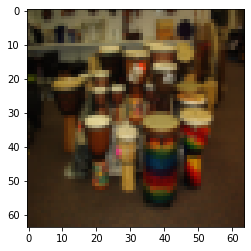

In [ ]:
# Load image data.
X_train, Y_train, X_test, Y_test = load_h5py_data(5, show_example=True)

In [ ]:
# Call the see_shapes() function.
None

In [ ]:
# Call the flatten() function.
X_train, X_test = None

In [ ]:
# Call the normalize() function.
X_train, X_test = None

**Step 3.1b:**  Create a simple perceptron model   
Setup 1 Dense layer consisting of a single instance of the Dense class with 1 output unit, and a number of input units equal to the number of features in X.   
Set the activation function to sigmoid.

In [ ]:
### BEGIN CODE HERE

# Instantiate a simple perceptron.
perceptron = None

np.random.seed(3) #do not change for grading purposes

# Build your model.
perceptron.build([
                  None
])

### END CODE HERE

**Step 3.1c:**  Train the model using the fit() method  
Use 2501 epochs and a learning_rate of 0.0075.   
Don’t worry about passing anything for verbose or callback.


In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data (remember the fit() method returns a list of costs).
# Use 2501 epochs and a learning_rate of 0.0075. Don’t pass anything for verbose or callback.
costs = None

### END CODE HERE

**Step 3.1d:**  Plot the costs  
Make sure your doctests pass without errors.

In [ ]:
### BEGIN CODE HERE

# Call the plotting function.
None

### END CODE HERE

import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.74
  >>> print(np.round(costs[75], 3))
  0.543
  >>> print(np.round(costs[1025], 3))
  0.153
  >>> print(np.round(costs[1557], 3))
  0.114
  >>> print(np.round(costs[2500], 3))
  0.078
"""

doctest.testmod()


**Step 3.1e:**  Make predictions on training and test datasets, using the perceptron’s “predict” method.  
Make sure your doctests pass without errors.


In [ ]:
### BEGIN CODE HERE

# Make predictions on the train set.
predictions_train = None

# Make predictions on the test set.
predictions_test = None

### END CODE HERE


import doctest

"""
  >>> print(predictions_train[0][17])
  0
  >>> print(predictions_train[0][50])
  1
  >>> print(predictions_test[0][15])
  1
  >>> print(predictions_test[0][6])
  0
"""

doctest.testmod()

**Step 3.1f:** Evaluate performance of the training and test datasets  
Make sure your doctests pass without errors.


In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the train set.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(perceptron.evaluate(predictions_train, Y_train), 3))
  99.522
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the test set.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(perceptron.evaluate(predictions_test, Y_test), 3))
  66.0
"""

doctest.testmod()

### 3.2 Two-layer Model
In this section you will test your framework to classify real image data using a multi-layer model, we'll start with 2 layers. Test your code using the example data in the following code cells. Complete the following steps and refer to the previous lecture units for guidance.


**Note**, you will need to reload the images and rerun the preprocessing steps when switching the model.

**Step 3.2a:**  Create a two-layer model   
Setup 2 Dense layers.  When building the network, use a hidden layer (ie the first layer) with 7 output units, a number of input units equal to the number of features in X, and a relu activation function.   
Use a simple perceptron as your output layer.  Remember to set the input units for the output layer equal to the output units of the first layer, and use a sigmoid activation function in the output layer.


In [ ]:
### BEGIN CODE HERE

# Instantiate your model.
two_layer = None

np.random.seed(5)  #do not change for grading purposes

# Build a model with one hidden layer.
two_layer.build([
               None,
               None
])

### END CODE HERE



**Step 3.2b:**  Train the model   
Call the “fit” method, and use the same number of epochs and learning rate  as with the simple perceptron model to get a list of costs, then plot them to visualize training.   
Make sure your doctests pass without errors.

In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data.
# Use 2501 epochs and a learning_rate of 0.0075. Don’t pass anything for verbose or callback.
costs = None

### END CODE HERE

In [ ]:
### BEGIN CODE HERE

# Plot the costs.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.958
  >>> print(np.round(costs[75], 3))
  0.543
  >>> print(np.round(costs[1025], 3))
  0.137
  >>> print(np.round(costs[1557], 3))
  0.048
  >>> print(np.round(costs[2500], 3))
  0.021
"""

doctest.testmod()

**Step 3.2c:** Evaluate performance of the training and test datasets  
Make sure your doctests pass without errors.


In [ ]:
### BEGIN CODE HERE

# Make predictions on the train set.
predictions_train = None

# Make predictions on the test set.
predictions_test = None

### END CODE HERE


import doctest

"""
  >>> print(predictions_train[0][17])
  0
  >>> print(predictions_train[0][50])
  1
  >>> print(predictions_test[0][15])
  1
  >>> print(predictions_test[0][6])
  0
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the train set.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(two_layer.evaluate(predictions_train, Y_train), 3))
  99.522
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the test set.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(two_layer.evaluate(predictions_test, Y_test), 3))
  76.0
"""

doctest.testmod()

### 3.3 L-layer (multi-layer) Model
In this section you will test your framework to classify real image data using a multi-layer model.  Test your code using the example data in the following code cells. Complete the following steps and refer to the previous lecture units for guidance.

**Note**, you will need to reload the images and rerun the preprocessing steps when switching the model.


**Step 3.3a:**  Create a four-layer model   
The first layer should have 20 nodes, the second 7, the third 5, and the fourth and final layer (output layer) only 1.  
These numbers were worked out through what is called hyperparameter optimization, which is something you will learn about later in this stream.   
The final layer should use a ‘sigmoid’ activation function, but the rest should all use ‘relu’.


In [ ]:
### BEGIN CODE HERE

# Instantiate your model.
l_layer = None

np.random.seed(3)  #do not change for grading purposes

# Build a network with 4 layers.
# The first layer should have 20 nodes, the second 7, the third 5, and the output layer only 1.
l_layer.build([
               None
               None
               None
               None
])

### END CODE HERE

**Step 3.3b:**  Train the model
Call the “fit” method, and use the same number of epochs and learning rate  as with the simple perceptron model to get a list of costs, then plot them to visualize training.   
Make sure your doctests pass without errors.

In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data.
# Use 2501 epochs and a learning_rate of 0.0075. Don’t pass anything for verbose or callback.
costs = None

### END CODE HERE

In [ ]:
### BEGIN CODE HERE

# Plot the costs.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.812
  >>> print(np.round(costs[75], 3))
  0.672
  >>> print(np.round(costs[1025], 3))
  0.051
  >>> print(np.round(costs[1557], 3))
  0.015
  >>> print(np.round(costs[2500], 3))
  0.005
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Make predictions on the train set.
predictions_train = None

# Make rpedictions on the test set.
predictions_test = None

### END CODE HERE


import doctest

"""
  >>> print(predictions_train[0][17])
  0
  >>> print(predictions_train[0][50])
  1
  >>> print(predictions_test[0][15])
  1
  >>> print(predictions_test[0][6])
  0
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the train set.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(l_layer.evaluate(predictions_train, Y_train), 3))
  100.0
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the test set.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(l_layer.evaluate(predictions_test, Y_test), 3))
  80.0
"""

doctest.testmod()

## Project 2a:  Planar Data Classification

In this project, we’ll continue our use of the multi-layer perceptron framework you created to perform a more complex classification task.

We'll show how easy it is to generalize to different tasks when you have a framework by performing binary classification on planar data.  This task will help you visualize the sort of non-linear decision boundaries we can achieve as you saw with the XOR gate.  
<br>
**Note:** You should restart the runtime and rerun the initialization steps (drive mount, imports, and function cells) to properly set up the environment before running these steps.


**Step 4a:** Data set up
Run the following code cells to create the dataset and make_plot function, then call make_plot() with a suitable title to plot it.
You should see a distribution of points in a plane.   
The points are either red or blue, and you will be building a model to define a decision boundary which separates the points based on color.
Run the "Reshaping" cell then call see_shapes() to see more information about your data.  You should see the following shapes:
- Number of training examples: m_train =  2
- Number of testing examples: m_test =  2
- X_train shape:  (2, 900)
- Y_train shape:  (1, 900)
- X_test shape:  (2, 100)
- Y_test shape:  (1, 100)   

Each example has two features (that is, the x and y coordinates in the plane) and one label (that is,  the color of the point).


In [ ]:
sns.set_style("whitegrid")

In [ ]:
# number of samples in the data set
N_SAMPLES = 1000

X, Y = make_moons(n_samples = N_SAMPLES, noise=0.2, random_state=100)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [ ]:
# the function making up the graph of a dataset
# Credit for visualizations: https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795
def make_plot(X, y, plot_name, file_name=None, XX=None, YY=None, preds=None, dark=False):
    if (dark):
        plt.style.use('dark_background')
    else:
        sns.set_style("whitegrid")
    plt.figure(figsize=(16,12))
    axes = plt.gca()
    axes.set(xlabel="$X_1$", ylabel="$X_2$")
    plt.title(plot_name, fontsize=30)
    plt.subplots_adjust(left=0.20)
    plt.subplots_adjust(right=0.80)
    if(XX is not None and YY is not None and preds is not None):
        plt.contourf(XX, YY, preds.reshape(XX.shape), 25, alpha = 1, cmap=cm.Spectral)
        plt.contour(XX, YY, preds.reshape(XX.shape), levels=[.5], cmap="Greys", vmin=0, vmax=.6)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), s=40, cmap=plt.cm.Spectral, edgecolors='black')
    if(file_name):
        plt.savefig(file_name)
        plt.close()

In [ ]:
# boundary of the graph
GRID_X_START = -1.5
GRID_X_END = 2.5
GRID_Y_START = -1.0
GRID_Y_END = 2

In [ ]:
# Create grid.
grid = np.mgrid[GRID_X_START:GRID_X_END:100j,GRID_X_START:GRID_Y_END:100j]
grid_2d = grid.reshape(2, -1).T
XX, YY = grid

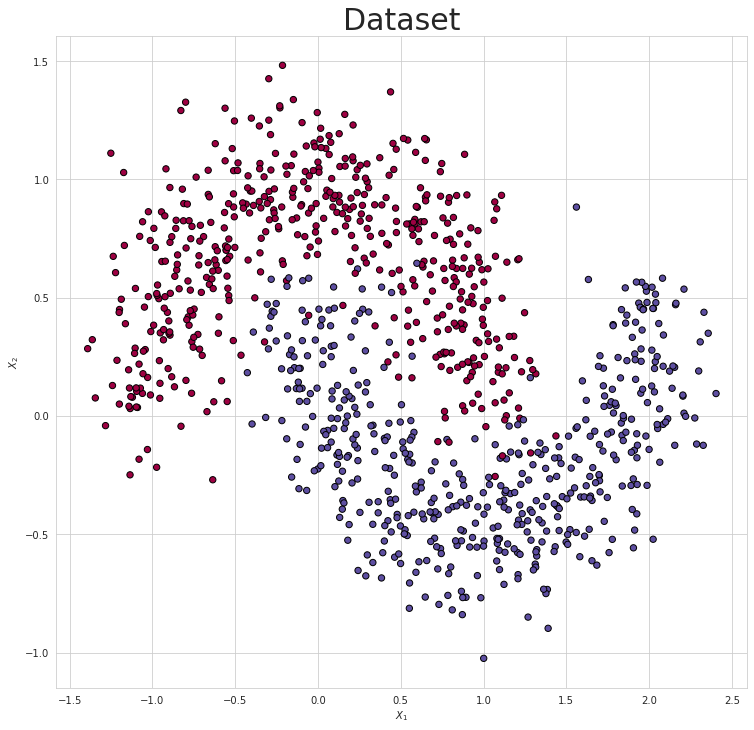

In [ ]:
### BEGIN CODE HERE

# Call make_plot (pass X, Y, and the name of the plot only).
make_plot(X, Y, "Dataset")

### END CODE HERE

In [ ]:
# Reshaping.
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.reshape(1, Y_train.shape[0])
Y_test = Y_test.reshape(1, Y_test.shape[0])

In [ ]:
### BEGIN CODE HERE

# Call see_shapes().
see_shapes(X_train, X_test, Y_train, Y_test)

### END CODE HERE

Number of training examples: m_train =  2
Number of testing examples: m_test =  2
X_train shape:  (2, 900)
Y_train shape:  (1, 900)
X_test shape:  (2, 100)
Y_test shape:  (1, 100)


### 4.1  Simple Perceptron Model

First we'll see how well a simple perceptron can do.   
Instantiate your “planar perceptron” model as a simple perceptron.  
This should be the same as the perceptron you made previously, but it's important that we create a new object as we need to rebuild the model to have the right input shape and reinitialized parameters.   
Follow the same procedure as you did in the previous project to build your model and fit it to the data.  Use 10,000 epochs and a learning rate of 0.01.   
Plot your costs and make predictions on the train and test sets, then evaluate performance.   
You should see that a simple perceptron classifies the data with around 87% accuracy at test time.
The final cell in the simple perceptron section plots the decision boundary as decided by the model post-training, and saves it as a png file.  Note that you can simply plot the output to the console by omitting the “file name” parameter.   
If you’ve defined a file name, run the cell then find the file in the file system of your colab notebook, and double click it to view in a scratch cell.   
As we discussed in a previous unit in this course and previous project in this script, you should see that the perceptron model gives a linear decision boundary (that is a straight line boundary).  However, note that since our dataset is not linearly separable, this isn’t good enough.

**Step 4.1a:** Create a simple perceptron model
Setup 1 Dense layer consisting of a single instance of the Dense class with 1 output unit, and a number of input units equal to the number of features in X.
Set the activation function to sigmoid.

In [ ]:
### BEGIN CODE HERE

# Instantiate your model.
np.random.seed(0) #do not change - for grading purposes

planar_perceptron = None

# Build a simple perceptron model.
# Setup 1 Dense layer consisting of a single instance of the Dense class
# with 1 output unit, and a number of input units equal to the
# number of features in X. Set the activation function to sigmoid.
planar_perceptron.build([
                         None
])

### END CODE HERE

**Step 4.1b:** Train the model using the fit() method.  
Use 10000 epochs and a learning_rate of 0.01.  
Don’t worry about passing anything for verbose or callback.

In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data.
# Use 10000 epochs and a learning_rate of 0.01. Don’t pass anything for verbose or callback.
costs = None

### END CODE HERE

**Step 4.1c:** Plot the costs.   
Make sure your doctests pass without errors.

In [ ]:
### BEGIN CODE HERE

# Plot the costs.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.636
  >>> print(np.round(costs[75], 3))
  0.594
  >>> print(np.round(costs[1025], 3))
  0.415
  >>> print(np.round(costs[1557], 3))
  0.383
  >>> print(np.round(costs[2500], 3))
  0.349
  >>> print(np.round(costs[5000], 3))
  0.308
  >>> print(np.round(costs[7500], 3))
  0.292
  >>> print(np.round(costs[9999], 3))
  0.285
"""

doctest.testmod()

**Step 4.1d:**  Make predictions on train and test sets and evaluate performance.  
Make sure your doctests pass without errors.

In [ ]:
### BEGIN CODE HERE

# Make predictions on the train set.
predictions_train = None

# Make predictions on the test set.
predictions_test = None

### END CODE HERE

import doctest

"""
  >>> print(predictions_train[0][17])
  0
  >>> print(predictions_train[0][50])
  1
  >>> print(predictions_test[0][15])
  1
  >>> print(predictions_test[0][6])
  0
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the train set.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(planar_perceptron.evaluate(predictions_train, Y_train), 3))
  87.444
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the test set.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(planar_perceptron.evaluate(predictions_test, Y_test), 3))
  83.0
"""

doctest.testmod()

**Step 4e:** Plot the dataset along with the predicted outputs and decision boundary.  
Upload screenshot of your make_plot image.

In [ ]:
preds = planar_perceptron.predict(np.transpose(grid_2d))
preds = preds.reshape(preds.shape[1], 1)
X_plt = X_test.T
Y_plt = Y_test.T

# Plot decision boundary.
# To save to a file set the 'file_name' parameter
#make_plot(X_plt, Y_plt, 'Simple Perceptron Model', file_name='Simple Perceptron.png', XX=XX, YY=YY, preds=preds)

# To plot to the console, do not set a 'file_name' parameter
make_plot(X_plt, Y_plt, 'Simple Perceptron Model', XX=XX, YY=YY, preds=preds)


### 4.2  L-Layer Model
Now create a deep neural network with 5 layers.
Set up your network with 25 nodes in the first hidden layer,  50 in the 2nd, 50 in the 3rd, 25 in the 4th, and 1 in the 5th.
Use the relu activation function for all but the output layer, which should use a sigmoid activation function.   
Don’t forget to set the number of input units in the first layer equal to the number of features in X as shown in the network figure.   
Again, follow the same procedure as was described in the previous parts.   
<br>
**Note**, you will need to reload the dataset and rerun the preprocessing steps when switching the model.


In [ ]:
### BEGIN CODE HERE

np.random.seed(0) #do not change - for grading purposes

# Instantiate your model.
planar_net = None

# Build a deep neural network.
# Now create a deep neural network with 5 layers. Set up your network with
# 25 nodes in the first hidden layer, 50 in the 2nd, 50 in the 3rd, 25 in the 4th,
# and 1 in the 5th. Use the relu activation function for all but the output layer,
# which should use a sigmoid activation function.
# Don’t forget to set the number of input units in the first layer equal to the
# number of features in X as shown in the network figure.
planar_net.build([
                  None,
                  None,
                  None,
                  None,
                  None,
])

### END CODE HERE

**Step 4.2b:** Train the model using the fit() method.  
Use 10000 epochs and a learning_rate of 0.01.  
Don’t worry about passing anything for verbose or callback.

In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data.
# Use 10000 epochs and a learning_rate of 0.01. Don’t pass anything for verbose or callback.
costs = None

### END CODE HERE

**Step 4.2c:** Plot the costs.   
Make sure your doctests pass without errors.

In [ ]:
### BEGIN CODE HERE

# Plot the costs.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(costs[0], 3))
  0.579
  >>> print(np.round(costs[75], 3))
  0.305
  >>> print(np.round(costs[1025], 3))
  0.219
  >>> print(np.round(costs[1557], 3))
  0.185
  >>> print(np.round(costs[2500], 3))
  0.117
  >>> print(np.round(costs[5000], 3))
  0.069
  >>> print(np.round(costs[7500], 3))
  0.065
  >>> print(np.round(costs[9999], 3))
  0.063
"""

doctest.testmod()

**Step 4.2d:**  Make predictions on train and test sets and evaluate performance.  
Make sure your doctests pass without errors.

In [ ]:
### BEGIN CODE HERE

# Make predictions on the train set.
predictions_train = None

# Make predictions on the test set.
predictions_test = None

### END CODE HERE


import doctest

"""
  >>> print(predictions_train[0][17])
  0
  >>> print(predictions_train[0][50])
  1
  >>> print(predictions_test[0][15])
  1
  >>> print(predictions_test[0][6])
  0
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the train set.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(planar_net.evaluate(predictions_train, Y_train), 3))
  97.333
"""

doctest.testmod()

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the test set.
None

### END CODE HERE


import doctest

"""
  >>> print(np.round(planar_net.evaluate(predictions_test, Y_test), 3))
  100.0
"""

doctest.testmod()

In [ ]:
preds = planar_net.predict(np.transpose(grid_2d))
preds = preds.reshape(preds.shape[1], 1)
X_test = X_test.T
Y_test = Y_test.T

# Plot decision boundary.
make_plot(X_test, Y_test, "Deep Model", file_name='Final Decision Boundary for Deep Model.png', XX=XX, YY=YY, preds=preds)
#make_plot(X_test, Y_test, "NumPy Model", XX=XX, YY=YY, preds=preds)

### 4.2  Visualize Learning

Now visualize the entire training process so you can see the training in action. To do this, we’ll be using a callback function.  Reference the lecture unit for more details on the visualization process and callback functions.  
Let’s take a look at the callback_plot” function.  
Most of the code here should be familiar, because this function takes in an index (that is, the epoch number), “X train” and “Y train”, then plots the decision boundary for the model at that epoch.   
It then saves the .png to the file system in colab.  
Now return to your colab implementation of the “fit” method.  Notice that we can pass a callback as an argument to fit().   
If a callback function has been passed (that is, the  callback parameter is not “None”), then we execute the function on every 50th epoch. This means we will have many .png files saved to our system (for instance, for 2500 epochs, this will be 2500/50 = 50 images.  
<br>
Now, reinitialize your model (to reset the parameters) with the same architecture as before.  
**Note**, you will need to reload the dataset and rerun the preprocessing steps when switching the model.   
<br>
Fit it to the data and remember to pass callback_plot” as the callback function, but keep everything else the same. Training should take a little longer (around 5 minutes) since we are visualizing.   
Once you are done training, take a look at the next cell in your reference Colab script. It's not important to understand the specifics of what’s happening here, but this cell ties all the .png files together into a single gif.   
Give your gif variable, "anim_file”, a descriptive name, such as “training.gif”.   
Then run the cell.


In [ ]:
# Callback function to plot decision boundaries during training.
def callback_plot(index, X_train, Y_train):
    plot_title = "L Layer Model - It: {:05}".format(index)
    file_name = "numpy_model_{:05}.png".format(index//50)
    preds = planar_net.predict(np.transpose(grid_2d))
    preds = preds.reshape(preds.shape[1], 1)
    X_plt = X_train.T
    Y_plt = Y_train.T
    make_plot(X_plt, Y_plt, plot_title, file_name=file_name, XX=XX, YY=YY, preds=preds, dark=True)

In [ ]:
### BEGIN CODE HERE

np.random.seed(0) #do not change - for grading purposes

# Instantiate your model.
planar_net = None

# Build a deep neural network.
planar_net.build([
                  None,
                  None,
                  None,
                  None,
                  None,
])

### END CODE HERE

In [ ]:
#Change directory to the folder you want to store your files to
# e.g.:  %cd drive/MyDrive/Colab\ Notebooks/MLF-500/ML500_ProjVisualizationFiles/
# Use '%cd drive/'your path here...'

In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data - REMEMBER to pass your callback function to fit().
# Use 10000 epochs and learning rate 0.01
costs = None

### END CODE HERE

In [ ]:
## Source: https://www.tensorflow.org/tutorials/generative/dcgan#create_a_gif
# Create a gif.
import imageio
import glob

anim_file = 'training.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('numpy_model_*.png')
  filenames = sorted(filenames)
  last = -1
  for i,filename in enumerate(filenames):
    frame = 2*(i)
    if round(frame) > round(last):
      last = frame
    else:
      continue
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

At this point you should have a training.gif file stored in the directory (folder) you specified in the previous cell.  Check out the visualization to see how your network converged to the decision boundary!  
<br>
STOP HERE, ANSWER THE QUESTIONS IN THE ASSIGNMENT, AND CONTINUE WITH THE NEXT UNIT IN THIS COURSE.

## Project 2b:  More Complex Data Classification
For the final project in this script, we’re going to return to classifying an image dataset.  
This time, instead of using the “h5py”, which we called the  “cats,  no-cats” dataset, we’ll use one that contains both cats and dogs, which we call “cats versus dogs”.  
<br>
**Note:** You should restart the runtime and rerun the initialization steps (drive mount, imports, and function cells) to properly set up the environment before running these steps.

**Step 5a:** Run the following cell to load the data.  Please refer to the lecture video for more details on the procedure.    
**Step 5b:** Next you’ll preprocess the data,  then convert to a numpy array for both the train and test inputs and output.  
**Step 5c:**  Next, call the see_shapes function.   You should see the following output:
- Number of training examples: m_train =  2326
- Number of testing examples: m_test =  465
- X_train shape:  (2326, 64, 64, 3)
- Y_train shape:  (2326, 1)
- X_test shape:  (465, 64, 64, 3)
- Y_test shape:  (465, 1)    

**Step 5d:** Next, flatten the images and then run the final reshaping for clarity.  You should see the following output:
- Flattened X_train shape: (12288, 2326)
- Y_train shape: (2326, 1)
- Flattened X_test shape: (12288, 465)
- Y_test shape: (465, 1)  
<br>  

Now you may recall that in the previous part of this project, our simple perceptron was able to achieve high train accuracy but a low ( that is only around 50%) test accuracy.   
**Step 5e:** Instantiate your model.  Build it with the same architecture as you used previously for the cat vs non-cat dataset.  
**Step 5f:** Fit it to the data.  Set verbose to be True so you can see the training in progress and don’t worry about setting the callback this time.   
**Step 5g:** Plot the costs, and evaluate performance


In [ ]:
# Load the data.
(ds_train, ds_test), ds_info = load_data('cats_vs_dogs')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteK1PMFJ/cats_vs_dogs-train.tfrecord


  0%|          | 0/23262 [00:00<?, ? examples/s]

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


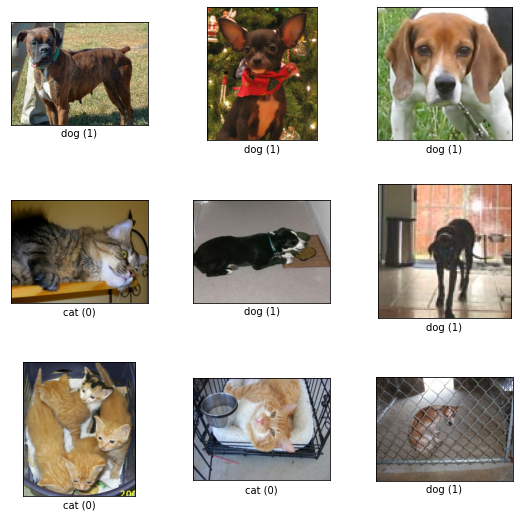

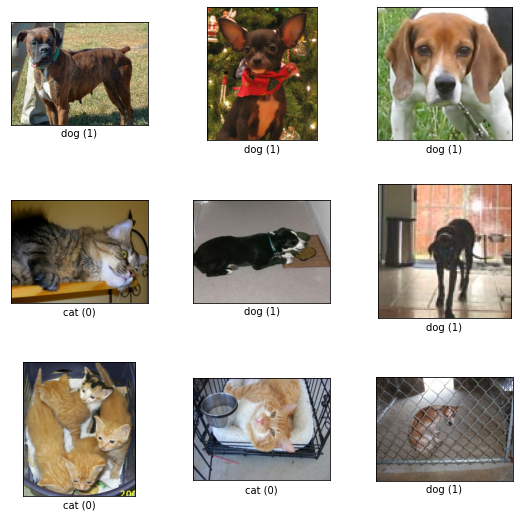

In [ ]:
tfds.visualization.show_examples(ds_train, ds_info)

In [ ]:
# Preprocess the train set.
ds_train = preprocess(ds_train, ds_info, 64)

Preprocessing complete.
The images are now of shape (64, 64, 3).
After one hot encoding, the labels are of shape (1,).
The images are now of shape (64, 64, 3).
After one hot encoding, the labels are of shape (1,).


In [ ]:
# Preprocess the test set.
ds_test = preprocess(ds_test, ds_info, 64)

Preprocessing complete.
The images are now of shape (64, 64, 3).
After one hot encoding, the labels are of shape (1,).
The images are now of shape (64, 64, 3).
After one hot encoding, the labels are of shape (1,).


In [ ]:
# Cast to numpy.
X_train, Y_train = as_numpy(ds_train)
X_test, Y_test = as_numpy(ds_test)

In [ ]:
### BEGIN CODE HERE

# Call the see_shapes() function.
None

### END CODE HERE

In [ ]:
### BEGIN CODE HERE

# Flatten the images.
X_train, X_test = None

### END CODE HERE

In [ ]:
# Reshape for clarity.
Y_train = Y_train.reshape(1, X_train.shape[1])
Y_test = Y_test.reshape(1, X_test.shape[1])

In [ ]:
### BEGIN CODE HERE

np.random.seed(0) #do not change - for grading purposes

# Instantiate your model.
model = None

# Build a deep neural network.
# Build it with the same architecture as you used previously for the cat vs non-cat dataset.
# Create the network with 4 layers:
# 20 nodes in the first hidden layer, 7 in the 2nd, 5 in the 3rd, 1 in the 4th.
# Use the relu activation function for all but the output layer,
# which should use a sigmoid activation function.
# Don’t forget to set the number of input units in the first layer equal to the
# number of features in X.
model.build([
             None,
             None,
             None,
             None
])

### END CODE HERE

In [ ]:
### BEGIN CODE HERE

# Fit your model to the training data and print the costs.
# Use 2001 epochs and a learning rate of 0.0075.
# Set the verbose parameter to True so that you can see the training details.
costs = None

### END CODE HERE

In [ ]:
### BEGIN CODE HERE

# Plot the costs.
None

### END CODE HERE

In [ ]:
### BEGIN CODE HERe

# Make predictions on the train set.
predictions_train = None

# Make predictions on the test set.
predictions_test = none

### END CODE HERE

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the train set.
None

### END CODE HERE

In [ ]:
### BEGIN CODE HERE

# Evaluate performance on the test set.
None

### END CODE HERE